# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1. Built-in Sobel, Prewitt, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewitt, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

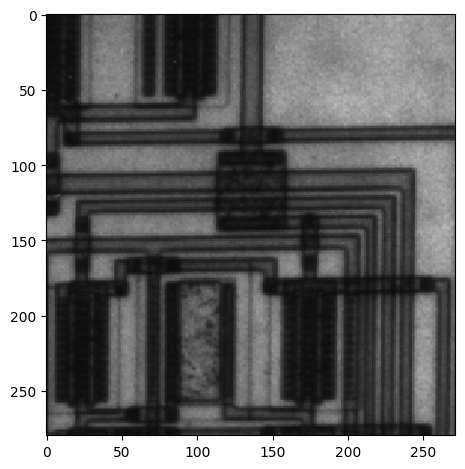

In [3]:

img = io.imread('circuit.tif')

io.imshow(img)

## Experiment 1: Built-in Sobel, Prewitt, Roberts, Canny

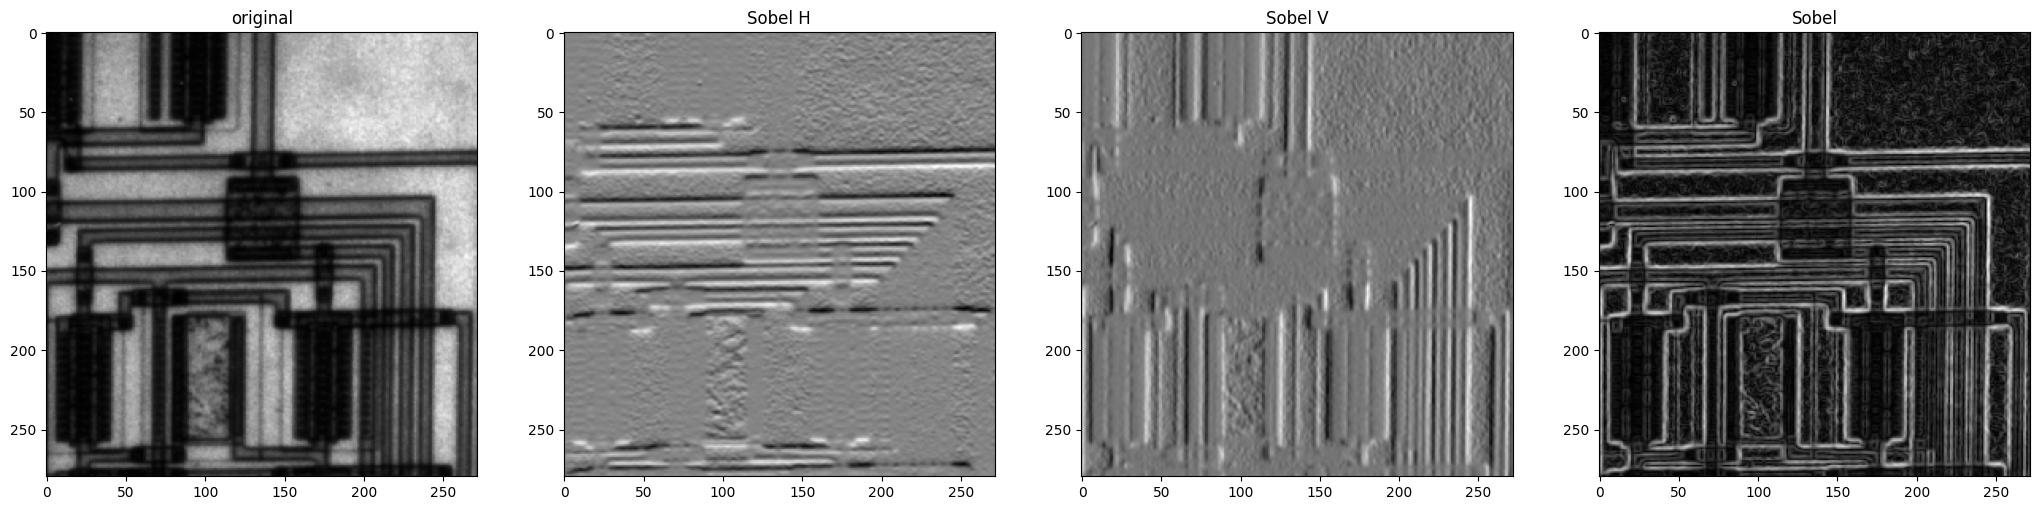

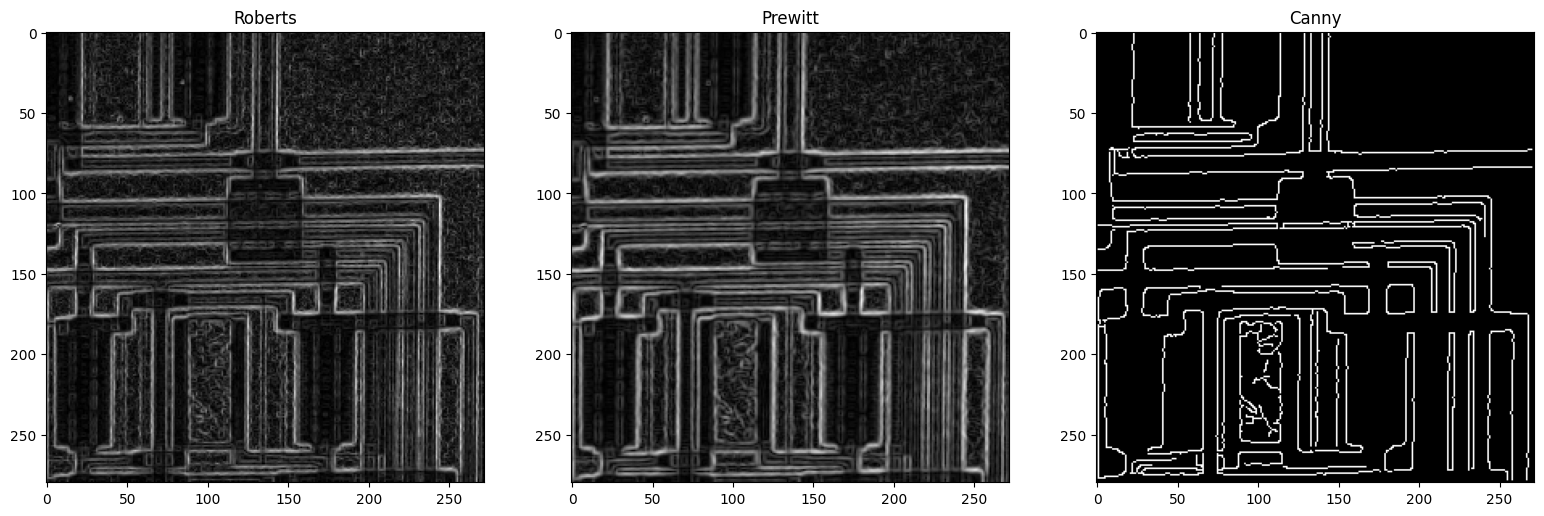

In [4]:
# 1. Built-in Sobel, Prewitt, Roberts, Canny
sobel_output = sobel(img)
sobel_h_output = sobel_h(img)
sobel_v_output = sobel_v(img)
prewitt_output = prewitt(img)
roberts_output = roberts(img)
canny_output = canny(img, low_threshold=30, high_threshold=100)

show_images(images=[img, sobel_h_output, sobel_v_output, sobel_output],
            titles=['original', 'Sobel H', 'Sobel V', 'Sobel'])

show_images(images=[roberts_output, prewitt_output, canny_output],
            titles=['Roberts', 'Prewitt', 'Canny'])


## Experiment 2: Custom Sobel

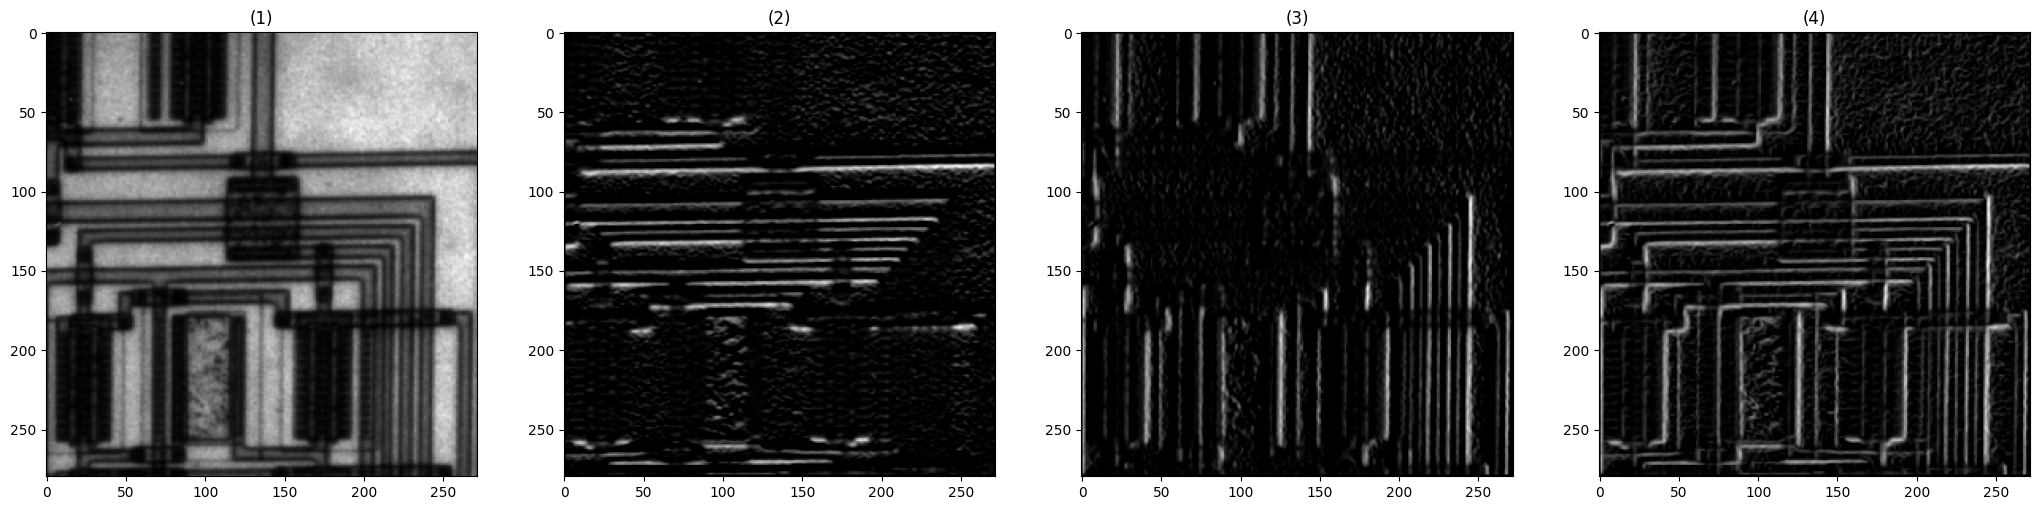

In [5]:
# 2. Custom Sobel (V-H-Both)

def custom_convolve2d(image, filter, threshold=0):
    output = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            output[i, j] = np.sum(filter * img[i-1: i+2, j-1: j+2]) # 3x3 window: i-1, i, i+1
            
    output[output < threshold] = 0      
    
    return output

H_FILTER = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

V_FILTER = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

custom_sobel_h_out = custom_convolve2d(gaussian(img), H_FILTER)
custom_sobel_v_out = custom_convolve2d(gaussian(img), V_FILTER)
custom_sobel_out = np.sqrt(custom_sobel_h_out**2 + custom_sobel_v_out**2)

show_images(images=[img, custom_sobel_h_out, custom_sobel_v_out, custom_sobel_out])

## Experiment 3: Laplace of Gaussian

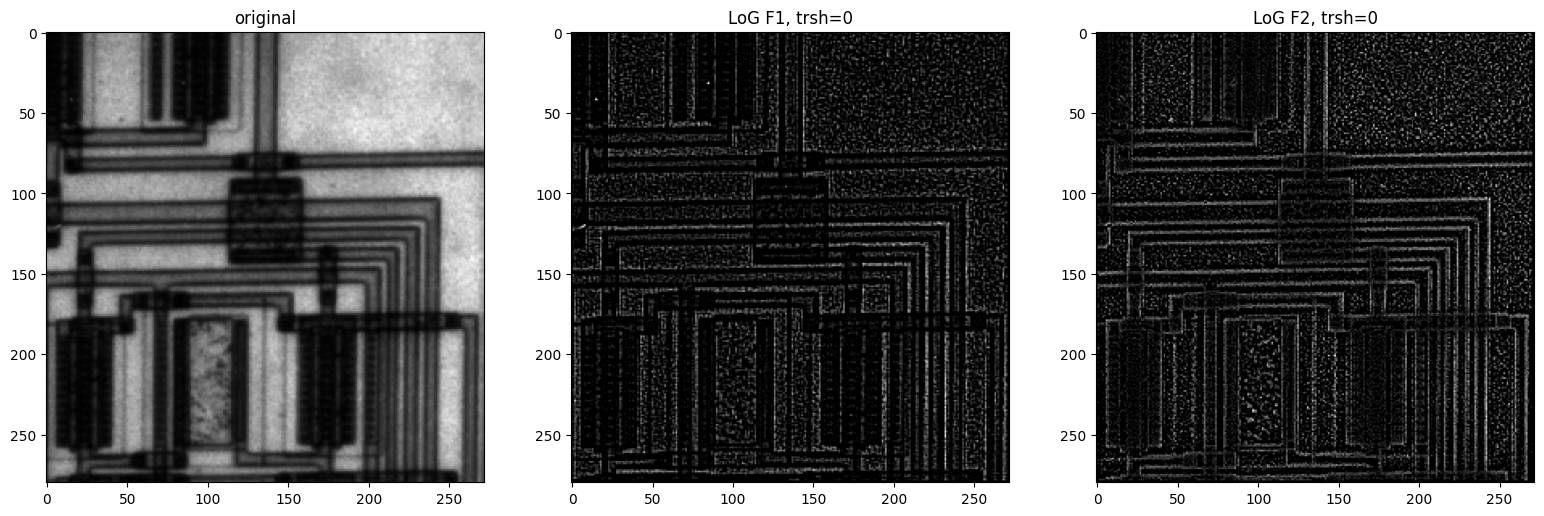

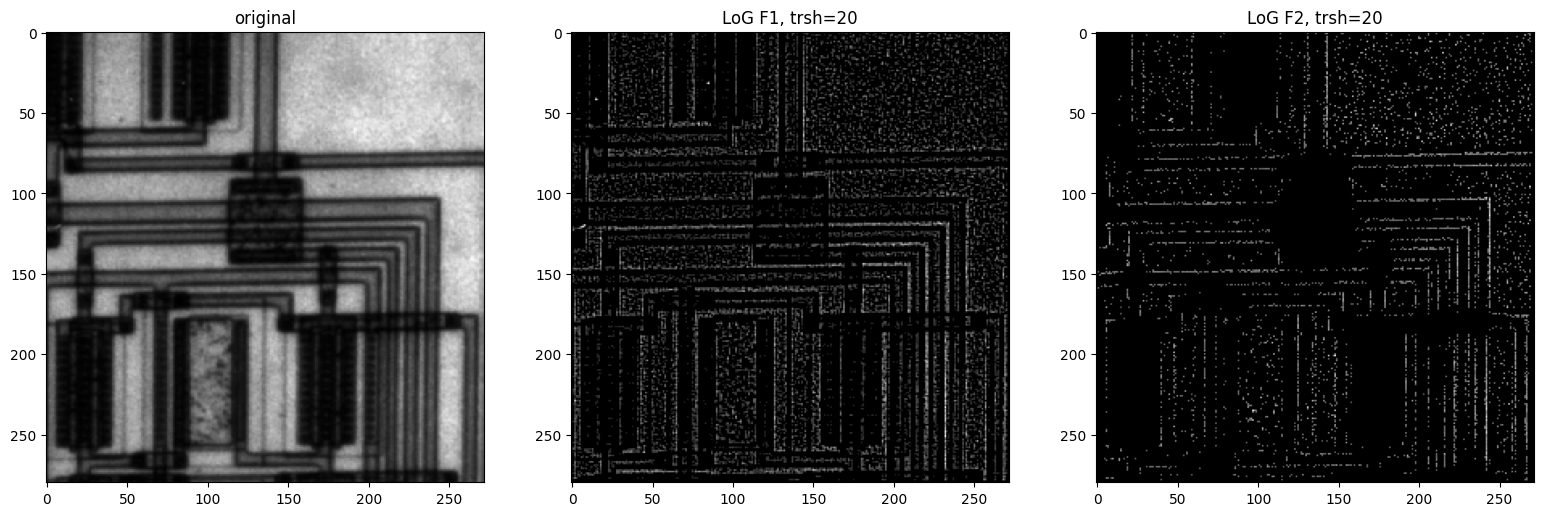

In [31]:
# 3. Custom LoG
trsh1= 0
trsh2= 20

# i think this is N8 neighborhood
F1 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

# i think this is N4 neighborhood
F2 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

img_after_F1_trsh1 = custom_convolve2d(gaussian(img, 1), F1, trsh1)
img_after_F2_trsh1 = custom_convolve2d(gaussian(img, 1), F2, trsh1)
show_images(images=[img, img_after_F1_trsh1, img_after_F2_trsh1],
            titles=['original', f'LoG F1, trsh={trsh1}', f'LoG F2, trsh={trsh1}'])

img_after_F1_trsh2 = custom_convolve2d(gaussian(img, 1), F1, trsh2)
img_after_F2_trsh2 = custom_convolve2d(gaussian(img, 1), F2, trsh2)
show_images(images=[img, img_after_F1_trsh2, img_after_F2_trsh2],
            titles=['original', f'LoG F1, trsh={trsh2}', f'LoG F2, trsh={trsh2}'])

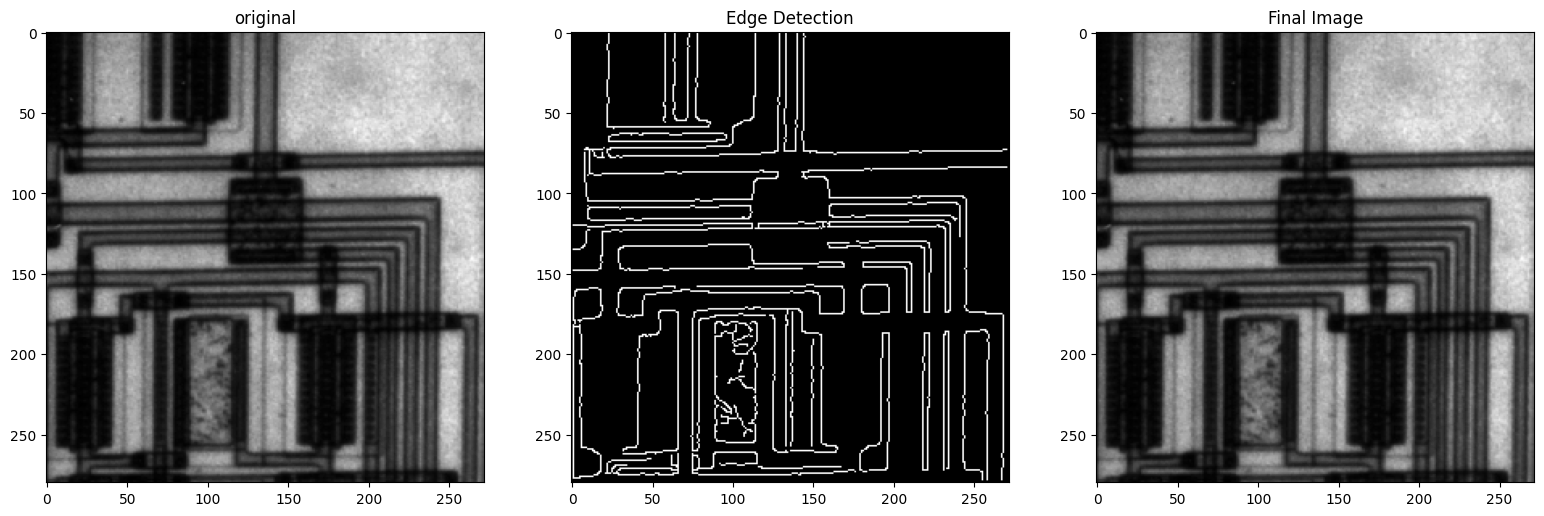

In [30]:

'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

test_img = canny(img, low_threshold=30, high_threshold=100)
test_img = test_img * 0.5
test_ouptut = img - test_img
show_images(images=[img, test_img, test_ouptut],
            titles=['original', 'Edge Detection', 'Final Image'])

# if factor < 1, the edges are partially removed 
# if factor = one, the edges are completely removed